In [1]:
import pandas
import numpy as np

In [2]:
# Загружаем данные
train = pandas.read_csv('./data/features.csv', index_col='match_id')
test = pandas.read_csv('./data/features_test.csv', index_col='match_id')

# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# И разделяем датасет на признаки и целевую переменную
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']

In [3]:
X

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,1,8,3,967,1136,7,1,0,8,...,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,1,26.0,119.0,-61.0,NaN,2,3,4,0,-15.0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,1,9.0,NaN,-84.0,226.0,1,3,4,0,26.0


In [4]:
# Заменяем пропуски на 0
def clean(X):
    return X.fillna(0)

In [5]:
# В данных присутствует 11 категориальных признаков, удаляем их
def clean_category(X):
    X = clean(X)
    del X['lobby_type']
    for n in xrange(1, 6):
        del X['r{}_hero'.format(n)]
        del X['d{}_hero'.format(n)]

    return X

In [30]:
X=clean_category(X)
X

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,5,2098,1489,20,0,0,7,3,842,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,4,1188,1033,9,0,1,12,4,1596,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,4,1319,1270,22,0,0,12,3,1314,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,4,1779,1056,14,0,0,5,2,539,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,4,1431,1090,8,1,0,8,2,629,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,5,1961,1461,19,0,1,6,2,441,...,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,3,967,1136,7,1,0,8,4,1774,...,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,5,2117,1252,16,0,0,6,3,1378,...,1,26.0,119.0,-61.0,0.0,2,3,4,0,-15.0
11,1430308974,5,1527,906,10,0,1,7,3,733,...,1,9.0,0.0,-84.0,226.0,1,3,4,0,26.0


In [ ]:
# Формируем "мешок слов" по героям
def hero_bag(X):
    X_pick = np.zeros((X.shape[0], len(heroes)))
    for i, match_id in enumerate(X.index):
        for p in xrange(5):
            X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

    return pandas.DataFrame(X_pick, index=X.index)

In [31]:
#число героев в игре
heroes = pandas.read_csv('./data/dictionaries/heroes.csv')
len(heroes)

112

In [35]:
# N — количество различных героев в выборке
X_pick = np.zeros((X.shape[0], len(heroes)))
for i, match_id in enumerate(X.index):
    for p in xrange(5):
        X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

d:\Python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


KeyError: 'r1_hero'

In [ ]:
for i, match_id in enumerate(data.index):
    for p in xrange(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

In [36]:
import collections, re
texts = ['John likes to watch movies. Mary likes too.',
'John also likes to watch football games.']
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
    for txt in texts]
bagsofwords[0]
Counter({'likes': 2, 'watch': 1, 'Mary': 1, 'movies': 1, 'John': 1, 'to': 1, 'too': 1})
bagsofwords[1]
Counter({'watch': 1, 'games': 1, 'to': 1, 'likes': 1, 'also': 1, 'John': 1, 'football': 1})
sumbags = sum(bagsofwords, collections.Counter())
sumbags
Counter({'likes': 3, 'watch': 2, 'John': 2, 'to': 2, 'games': 1, 'football': 1, 'Mary': 1, 'movies': 1, 'also': 1, 'too': 1})


NameError: name 'Counter' is not defined

In [37]:
import collections, re

In [38]:
texts = ['John likes to watch movies. Mary likes too.',
'John also likes to watch football games.']

In [39]:
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
    for txt in texts]

In [42]:
bagsofwords[0]

Counter({'John': 1,
         'Mary': 1,
         'likes': 2,
         'movies': 1,
         'to': 1,
         'too': 1,
         'watch': 1})

In [43]:
bagsofwords[1]

Counter({'John': 1,
         'also': 1,
         'football': 1,
         'games': 1,
         'likes': 1,
         'to': 1,
         'watch': 1})

In [44]:
sumbags = sum(bagsofwords, collections.Counter())

In [45]:
sumbags

Counter({'John': 2,
         'Mary': 1,
         'also': 1,
         'football': 1,
         'games': 1,
         'likes': 3,
         'movies': 1,
         'to': 2,
         'too': 1,
         'watch': 2})

In [52]:
#0
import os
import pandas

In [46]:
#1
# Формируем "мешок слов" по героям
def hero_bag(X):
    X_pick = np.zeros((X.shape[0], len(heroes)))
    for i, match_id in enumerate(X.index):
        for p in xrange(5):
            X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

    return pandas.DataFrame(X_pick, index=X.index)

In [64]:
#5
save_clean_data(hero_bag, X, y, test, name='hero_bag')

d:\Python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


KeyError: 'r1_hero'

In [48]:
#2
def save_clean_data(cleaner, X_train, y_train, X_test, name='simple'):
    path = './data/clean/' + name
    if not os.path.exists(path):
        os.makedirs(path)

    y_train.to_csv(path + '/y_train.csv')
    cleaner(X_train).to_csv(path + '/X_train.csv')
    cleaner(X_test).to_csv(path + '/X_test.csv')

In [68]:
#8
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print 'C =', str(C)
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print model_scores
        print 'Time elapsed:', datetime.datetime.now() - start_time       
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score

In [66]:
#7
X, y, X_kaggle = get_clean_data('clean_category')

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), index = X.index)


X = pandas.concat([X, X_hero], axis=1)


kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

In [69]:
#9
C, score = test_model(X, y)

C = 1e-05
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:19.143000
C = 0.0001
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:18.006000
C = 0.001
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:11.864000
C = 0.01
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:17.941000
C = 0.1
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:14.335000
C = 1.0


KeyboardInterrupt: 

In [56]:
#3
def get_clean_data(cleaner_name='simple'):
    path = './data/clean/' + cleaner_name
    X_train = pandas.read_csv('X_train.csv', index_col='match_id')
    y_train = pandas.read_csv('y_train.csv', index_col='match_id')
    X_test = pandas.read_csv('X_test.csv', index_col='match_id')
    return X_train, y_train['radiant_win'], X_test

In [1]:
#-1
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

d:\Python\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
#6
X_hero, _y, X_kaggle_hero =get_clean_data('hero_bag')

In [1]:
#-1
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

d:\Python\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#0
import os
import pandas

In [3]:
# Загружаем данные
train = pandas.read_csv('./data/features.csv', index_col='match_id')
test = pandas.read_csv('./data/features_test.csv', index_col='match_id')

# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# И разделяем датасет на признаки и целевую переменную
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']

In [4]:
X

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,1,8,3,967,1136,7,1,0,8,...,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,1,26.0,119.0,-61.0,NaN,2,3,4,0,-15.0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,1,9.0,NaN,-84.0,226.0,1,3,4,0,26.0


In [5]:
# Заменяем пропуски на 0
def clean(X):
    return X.fillna(0)

In [6]:
# В данных присутствует 11 категориальных признаков, удаляем их
def clean_category(X):
    X = clean(X)
    del X['lobby_type']
    for n in xrange(1, 6):
        del X['r{}_hero'.format(n)]
        del X['d{}_hero'.format(n)]

    return X

In [7]:
X=clean_category(X)
X

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,5,2098,1489,20,0,0,7,3,842,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,4,1188,1033,9,0,1,12,4,1596,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,4,1319,1270,22,0,0,12,3,1314,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,4,1779,1056,14,0,0,5,2,539,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,4,1431,1090,8,1,0,8,2,629,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,5,1961,1461,19,0,1,6,2,441,...,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,3,967,1136,7,1,0,8,4,1774,...,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,5,2117,1252,16,0,0,6,3,1378,...,1,26.0,119.0,-61.0,0.0,2,3,4,0,-15.0
11,1430308974,5,1527,906,10,0,1,7,3,733,...,1,9.0,0.0,-84.0,226.0,1,3,4,0,26.0


In [8]:
#1
# Формируем "мешок слов" по героям
def hero_bag(X):
    X_pick = np.zeros((X.shape[0], len(heroes)))
    for i, match_id in enumerate(X.index):
        for p in xrange(5):
            X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

    return pandas.DataFrame(X_pick, index=X.index)

In [9]:
#2
def save_clean_data(cleaner, X_train, y_train, X_test, name='simple'):
    path = './data/clean/' + name
    if not os.path.exists(path):
        os.makedirs(path)

    y_train.to_csv(path + '/y_train.csv')
    cleaner(X_train).to_csv(path + '/X_train.csv')
    cleaner(X_test).to_csv(path + '/X_test.csv')

In [10]:
#3
def get_clean_data(cleaner_name='hero_bag'):
    path = './data/clean/' + cleaner_name
    X_train = pandas.read_csv('X_train.csv', index_col='match_id')
    y_train = pandas.read_csv('y_train.csv', index_col='match_id')
    X_test = pandas.read_csv('X_test.csv', index_col='match_id')
    return X_train, y_train['radiant_win'], X_test

In [11]:
#число героев в игре
heroes = pandas.read_csv('./data/dictionaries/heroes.csv')
len(heroes)

112

In [12]:
#5
save_clean_data(hero_bag, X, y, test, name='hero_bag')

d:\Python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


KeyError: 'r1_hero'

In [13]:
#6
X_hero, _y, X_kaggle_hero =get_clean_data('hero_bag')

In [14]:
X_hero

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,1,8,3,967,1136,7,1,0,8,...,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,1,26.0,119.0,-61.0,0.0,2,3,4,0,-15.0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,1,9.0,0.0,-84.0,226.0,1,3,4,0,26.0


In [15]:
#7
X, y, X_kaggle = get_clean_data('clean_category')

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), index = X.index)


X = pandas.concat([X, X_hero], axis=1)


kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

In [16]:
#8
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print 'C =', str(C)
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print model_scores
        print 'Time elapsed:', datetime.datetime.now() - start_time       
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score

C = 1e-05
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:09.673000
C = 0.0001
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:10.424000
C = 0.001
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:10.296000
C = 0.01
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:10.416000
C = 0.1
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:09.888000
C = 1.0
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:09.130000
C = 10.0
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:10.651000
C = 100.0
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:09.310000
C = 1000.0
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:09.386000
C = 10000.0
[ 0.51184163  0.51560695  0.51597178  0.50921324  0.51460449]
Time elapsed: 0:00:09

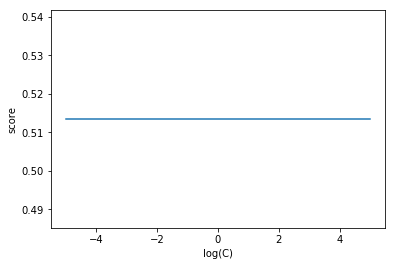

In [17]:
#9
C, score = test_model(X, y)